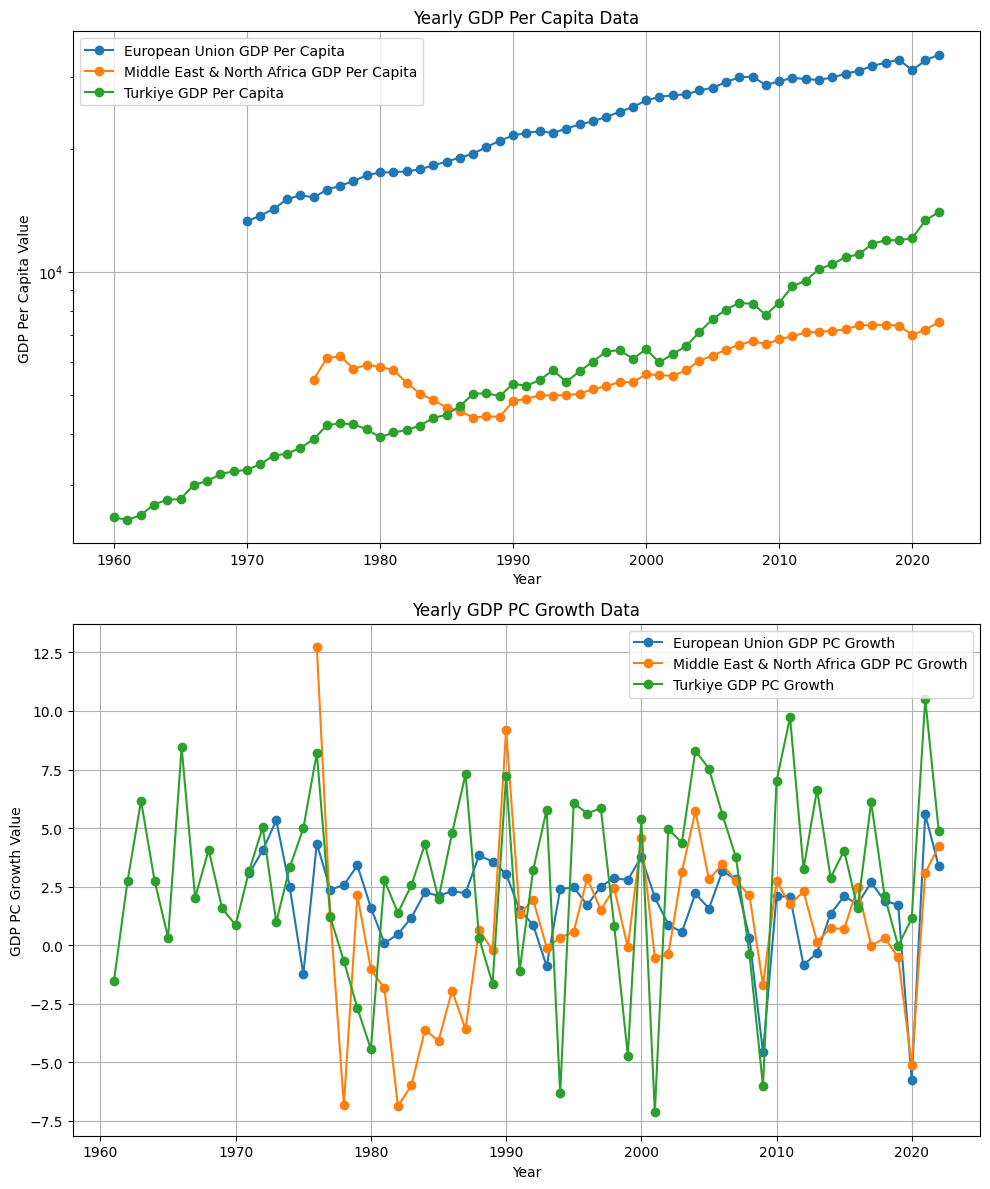

In [1]:
import psycopg2
import matplotlib.pyplot as plt

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    dbname="country_economics",
    user="postgres",
    password="3204965",
    host="localhost",
    port="5432"
)

# Create a cursor
cur = conn.cursor()

# Construct the list of year columns dynamically
year_columns = ",\n".join([f"year_{year}" for year in range(1960, 2023)])

# SQL query
sql_query = f"""
    SELECT
        gdp.country_name,
        {year_columns}
    FROM gdp_per_capita AS gdp
    WHERE country_name IN ('Turkiye', 'European Union',
      'Middle East & North Africa');
"""

# Fetch data from the gdp_countries table
cur.execute(sql_query)
gdp_data = cur.fetchall()

# Fetch data from the inflation table
inf_query = f"""
    SELECT
        inf.country_name,
        {year_columns}
    FROM gdp_per_capita_growth AS inf
    WHERE country_name IN ('Turkiye', 'European Union',
      'Middle East & North Africa');
"""

cur.execute(inf_query)
inf_data = cur.fetchall()

# Close the cursor and connection
cur.close()
conn.close()

years = list(range(1960, 2023))
gdp_values = []
gdp_countries = []
inf_values = []
inf_countries = []

for row in gdp_data:
    country_name = row[0]
    gdp_values.append(row[1:])
    gdp_countries.append(country_name)

for row in inf_data:
    country_name = row[0]
    inf_values.append(row[1:])
    inf_countries.append(country_name)

# Create a line plot
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot GDP data in the first subplot
for country, gdp in zip(gdp_countries, gdp_values):
    axes[0].plot(years, gdp, marker='o', label=f"{country} GDP Per Capita")

axes[0].set_title("Yearly GDP Per Capita Data")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("GDP Per Capita Value")
axes[0].set_yscale("log")
axes[0].grid(True)
axes[0].legend()

# Plot inflation data in the second subplot
for country, inf in zip(inf_countries, inf_values):
    axes[1].plot(years, inf, marker='o', label=f"{country} GDP PC Growth")

axes[1].set_title("Yearly GDP PC Growth Data")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("GDP PC Growth Value")
# axes[1].set_yscale("log")
axes[1].grid(True)
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

## Turkey's GDP & Inflation within its Region
When you look at the graphs, you can see the GDP of Turkey 